# Analysis of ICSE Research Track Publications by Replicability & AI Use (2023 & 2024)

# Imports & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
import geopandas as gpd
        
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/david/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# All Papers
df_23 = pd.read_csv('results/bib/ICSE2023_papers.csv')
df_24 = pd.read_csv('results/bib/ICSE2024_papers.csv')
df_25 = pd.read_csv('results/bib/ICSE2025_papers.csv')

# Relevant LLM Papers
df_ai_23 = pd.read_csv('results/ai/AI_ICSE2023_papers.csv')
df_ai_24 = pd.read_csv('results/ai/AI_ICSE2024_papers.csv')
df_ai_25 = pd.read_csv('results/ai/AI_ICSE2025_papers.csv')

# Merge Relevant LLM papers with all papers
df_23 = df_23.merge(
    df_ai_23[["title", "reviewer", "relevant"]],
    on="title",
    how="left"
)
df_23["reviewer"] = df_23["reviewer"].fillna("N/A")
df_23["relevant"] = df_23["relevant"].fillna(False)
df_23["year"] = 2023

df_24 = df_24.merge(
    df_ai_24[["title", "reviewer", "relevant"]],
    on="title",
    how="left"
)
df_24["reviewer"] = df_24["reviewer"].fillna("N/A")
df_24["relevant"] = df_24["relevant"].fillna(False)
df_24["year"] = 2024

df_25 = df_25.merge(
    df_ai_25[["title", "reviewer", "relevant"]],
    on="title",
    how="left"
)
df_25["reviewer"] = df_25["reviewer"].fillna("N/A")
df_25["relevant"] = df_25["relevant"].fillna(False)
df_25["year"] = 2025

# Combine dataframes for all years
df_combined = pd.concat([df_23, df_24, df_25], ignore_index=True)

# Save df_combined to CSV
df_combined.to_csv('results/ICSE_all_papers.csv', index=False)

# Affiliations
df_aff = pd.read_csv('results/ICSE_all_affiliations_countries.csv')

/var/folders/gw/jg8766954y92j4x7kpzdhg680000gp/T/ipykernel_33824/793117244.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_23["relevant"] = df_23["relevant"].fillna(False)
/var/folders/gw/jg8766954y92j4x7kpzdhg680000gp/T/ipykernel_33824/793117244.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_24["relevant"] = df_24["relevant"].fillna(False)
/var/folders/gw/jg8766954y92j4x7kpzdhg680000gp/T/ipykernel_33824/793117244.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future ve

In [3]:
df_23.head()

title  \
0    Log Parsing with Prompt-Based Few-Shot Learning   
1     Context-Aware Bug Reproduction for Mobile Apps   
2  Vulnerability Detection with Graph Simplificat...   
3  DIVER: Oracle-Guided SMT Solver Testing with U...   
4  On the Robustness of Code Generation Technique...   

                                             authors  \
0                       Le, Van-Hoang, Zhang, Hongyu   
1  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
2  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
3             Kim, Jongwook, So, Sunbeom, Oh, Hakjoo   
4  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   

                                            url  \
0  https://doi.org/10.1109/ICSE48619.2023.00204   
1  https://doi.org/10.1109/ICSE48619.2023.00196   
2  https://doi.org/10.1109/ICSE48619.2023.00191   
3  https://doi.org/10.1109/ICSE48619.2023.00187   
4  https://doi.org/10.1109/ICSE48619.2023.00181   

                                            abstract  artifact_available  \
0  Logs generated by large-scale software systems...               False   
1  Bug reports are vital for software maintenance...               False   
2  Prior studies have demonstrated the effectiven...               False   
3  We present DIVER, a novel technique for effect...                True   
4  Software engineering research has always being...               False   

   artifact_reusable  artifact_functional     ai reviewer  relevant  year  
0              False                False   True       DW      True  2023  
1              False                False   True       DW      True  2023  
2              False                False  False      N/A     False  2023  
3               True                False  False      N/A     False  2023  
4              False                False  False      N/A     False  2023

In [4]:
df_aff.head()

reviewer  relevant                                            title  \
0       DW      True  Log Parsing with Prompt-Based Few-Shot Learning   
1       DW      True  Log Parsing with Prompt-Based Few-Shot Learning   
2       DW      True   Context-Aware Bug Reproduction for Mobile Apps   
3       DW      True   Context-Aware Bug Reproduction for Mobile Apps   
4       DW      True   Context-Aware Bug Reproduction for Mobile Apps   

                                    original_authors  \
0                       Le, Van-Hoang, Zhang, Hongyu   
1                       Le, Van-Hoang, Zhang, Hongyu   
2  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
3  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
4  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   

                                            url extracted_author  \
0  https://doi.org/10.1109/ICSE48619.2023.00204     Van-Hoang Le   
1  https://doi.org/10.1109/ICSE48619.2023.00204     Hongyu Zhang   
2  https://doi.org/10.1109/ICSE48619.2023.00196     Yuchao Huang   
3  https://doi.org/10.1109/ICSE48619.2023.00196      Junjie Wang   
4  https://doi.org/10.1109/ICSE48619.2023.00196          Zhe Liu   

                                        affiliations    country  
0  School of Information and Physical Sciences, T...  Australia  
1  School of Big Data and Software Engineering, C...      China  
2  Science and Technology on Integrated Informati...      China  
3  Science and Technology on Integrated Informati...      China  
4  Science and Technology on Integrated Informati...      China

## Get Emails of Relevant Paper Authors

In [5]:
# relevant_authors = df_aff[df_aff['relevant']]
# print("author,affiliation,title,url,email")
# count = 0
# for index, row in relevant_authors.iterrows():
#     print(f'{row['extracted_author']},"{row['affiliations']}","{row['title']}",{row['url']},')
#     count += 1
# print(f"Total relevant authors: {count}")

In [6]:
# df_emails = pd.read_csv('results/relevant_author_emails.csv')

# print(f"Total unique emails: {len(df_emails['email'].unique())}")
# emails_string = ', '.join(df_emails['email'].dropna().astype(str).tolist())
# print(emails_string)

# Overall Summary

In [7]:
def conference_overview(df, title):
    """
    Print a summary of the conference data.
    """
    print(title)
    print("------------------------")
    print(f"Total papers: {len(df)}\n")
    print(df["ai"].value_counts())
    print()
    print(f"Total Relevant LLM papers: {df['relevant'].sum()}\n")
    print(df["artifact_available"].value_counts())

    papers_with_artifacts = df[df["artifact_available"]]
    print(f"\nOf {len(papers_with_artifacts)} papers with available artifacts:")
    print(f"{papers_with_artifacts['artifact_reusable'].sum()} reusable artifacts")
    print(f"{papers_with_artifacts['artifact_functional'].sum()} functional artifacts\n\n")

In [61]:
conference_overview(df_23, "Overview for ICSE 2023")
conference_overview(df_24, "Overview for ICSE 2024")
conference_overview(df_25, "Overview for ICSE 2025")

Overview for ICSE 2023
------------------------
Total papers: 210

ai
False    159
True      51
Name: count, dtype: int64

Total Relevant LLM papers: 23

artifact_available
False    130
True      80
Name: count, dtype: int64

Of 80 papers with available artifacts:
51 reusable artifacts
13 functional artifacts


Overview for ICSE 2024
------------------------
Total papers: 236

ai
False    144
True      92
Name: count, dtype: int64

Total Relevant LLM papers: 54

artifact_available
False    157
True      79
Name: count, dtype: int64

Of 79 papers with available artifacts:
63 reusable artifacts
2 functional artifacts


Overview for ICSE 2025
------------------------
Total papers: 246

ai
True     145
False    101
Name: count, dtype: int64

Total Relevant LLM papers: 97

artifact_available
False    159
True      87
Name: count, dtype: int64

Of 87 papers with available artifacts:
54 reusable artifacts
68 functional artifacts




In [9]:
# Calculate proportions in the combined dataset
total_relevant = df_combined['relevant'].sum()
total_non_relevant = (~df_combined['relevant']).sum()

relevant_with_artifact = df_combined[(df_combined['relevant']) & (df_combined['artifact_available'])].shape[0]
non_relevant_with_artifact = df_combined[(~df_combined['relevant']) & (df_combined['artifact_available'])].shape[0]

prop_relevant = relevant_with_artifact / total_relevant if total_relevant > 0 else 0
prop_non_relevant = non_relevant_with_artifact / total_non_relevant if total_non_relevant > 0 else 0

print(f"Proportion of relevant papers with artifact available: {prop_relevant:.2%} ({relevant_with_artifact}/{total_relevant})")
print(f"Proportion of other papers with artifact available: {prop_non_relevant:.2%} ({non_relevant_with_artifact}/{total_non_relevant})")

Proportion of relevant papers with artifact available: 19.54% (34/174)
Proportion of other papers with artifact available: 40.93% (212/518)


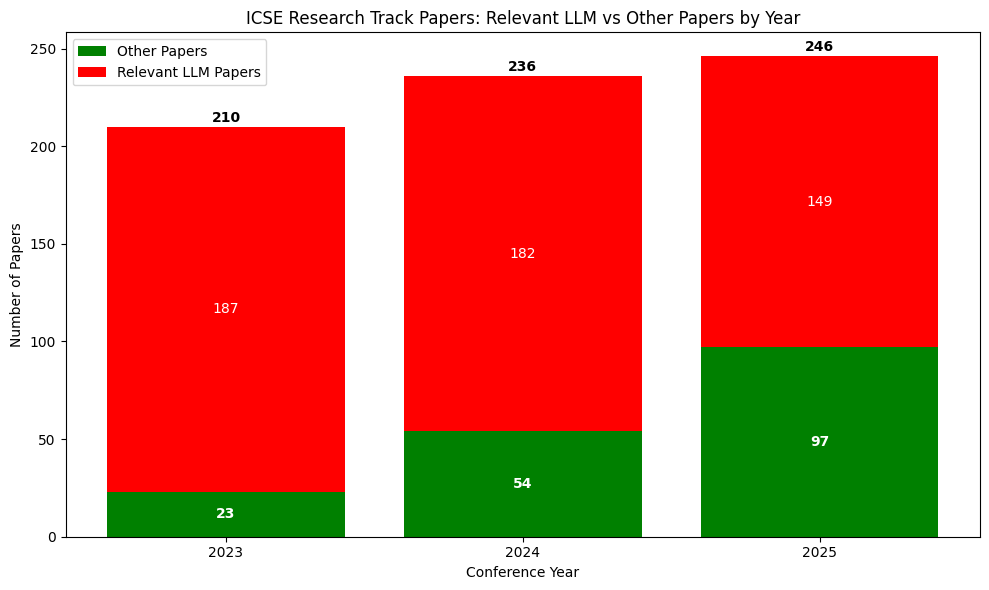

Summary Statistics:
----------------------------------------
ICSE 2023:
  Total papers: 210
  Relevant LLM papers: 23 (11.0%)
  Other papers: 187 (89.0%)

ICSE 2024:
  Total papers: 236
  Relevant LLM papers: 54 (22.9%)
  Other papers: 182 (77.1%)

ICSE 2025:
  Total papers: 246
  Relevant LLM papers: 97 (39.4%)
  Other papers: 149 (60.6%)



In [60]:
def create_relevant_papers_comparison(df_23, df_24, df_25):
    """
    Create a stacked bar chart comparing relevant vs other papers by year.
    
    Parameters:
    - df_23: DataFrame for ICSE 2023 papers
    - df_24: DataFrame for ICSE 2024 papers
    """
    # Calculate counts for each year
    years = ['2023', '2024', '2025']
    dataframes = [df_23, df_24, df_25]
    
    relevant_counts = []
    non_relevant_counts = []
    total_counts = []
    
    for df in dataframes:
        total = len(df)
        relevant = df['relevant'].sum()
        non_relevant = total - relevant
        
        total_counts.append(total)
        relevant_counts.append(relevant)
        non_relevant_counts.append(non_relevant)
    
    plt.figure(figsize=(10, 6))
    
    plt.bar(years, relevant_counts, label='Other Papers', color='green')
    plt.bar(years, non_relevant_counts, bottom=relevant_counts, label='Relevant LLM Papers', color='red')
    
    plt.xlabel('Conference Year')
    plt.ylabel('Number of Papers')
    plt.title('ICSE Research Track Papers: Relevant LLM vs Other Papers by Year')
    plt.legend()
    
    for i, year in enumerate(years):
        plt.text(i, total_counts[i] + 1, str(total_counts[i]), 
                ha='center', va='bottom', fontweight='bold')
        
        if relevant_counts[i] > 0:
            plt.text(i, relevant_counts[i]/2, str(relevant_counts[i]), 
                    ha='center', va='center', color='white', fontweight='bold')
        
        if non_relevant_counts[i] > 0:
            plt.text(i, relevant_counts[i] + non_relevant_counts[i]/2, str(non_relevant_counts[i]), 
                    ha='center', va='center', color='white')
    
    plt.tight_layout()
    plt.show()
    
    print("Summary Statistics:")
    print("-" * 40)
    for i, year in enumerate(years):
        print(f"ICSE {year}:")
        print(f"  Total papers: {total_counts[i]}")
        print(f"  Relevant LLM papers: {relevant_counts[i]} ({relevant_counts[i]/total_counts[i]*100:.1f}%)")
        print(f"  Other papers: {non_relevant_counts[i]} ({non_relevant_counts[i]/total_counts[i]*100:.1f}%)")
        print()

create_relevant_papers_comparison(df_23, df_24, df_25)

# Word Cloud of AI Abstracts

In [11]:
def create_wordcloud_with_ngrams(df, use_bigrams=False):
    """
    Create a word cloud from abstracts using either unigrams OR bigrams.
    
    Parameters:
    - use_bigrams: If True, creates bigram word cloud. If False, creates unigram word cloud.
    """
    # Filter for AI papers
    # TODO: Update condition when relevant papers are selected
    relevant_papers = df[df["relevant"]]
    
    # Combine all abstracts into one text
    all_abstracts = " ".join(relevant_papers["abstract"].astype(str))
    
    # Get standard English stopwords
    sw = set(stopwords.words('english'))
    
    # Tokenize and clean (common for both branches)
    tokens = word_tokenize(all_abstracts.lower())
    clean_tokens = [token for token in tokens if token.isalpha() and len(token) > 2 and token not in sw]
    
    if use_bigrams:
        # Generate bigrams
        bigram_list = list(bigrams(clean_tokens))
        bigram_strings = [f"{word1}_{word2}" for word1, word2 in bigram_list]
        
        # Count bigram frequencies
        word_freq = Counter(bigram_strings)
        
        # Create text for word cloud
        wordcloud_text = []
        for bigram, freq in word_freq.items():
            wordcloud_text.extend([bigram] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
        
    else:
        # For unigrams - use clean tokens
        word_freq = Counter(clean_tokens)
        
        # Create text for word cloud
        wordcloud_text = []
        for word, freq in word_freq.items():
            wordcloud_text.extend([word] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        stopwords=set(),  # No additional stopwords needed since we pre-filtered
        max_words=100,
        relative_scaling=0.5,
        colormap='viridis',
        collocations=False
    ).generate(wordcloud_input)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print top terms
    gram_type = "bigrams" if use_bigrams else "unigrams"
    print(f"\nTop 20 most frequent {gram_type} in {len(relevant_papers)} LLM paper abstracts:")
    for term, count in word_freq.most_common(20):
        print(f"{term}: {count}")
    
    return word_freq

## Individual Years

### Unigram Word Clouds

ICSE 2023 Relevant LLM Papers Word Cloud (Unigrams):


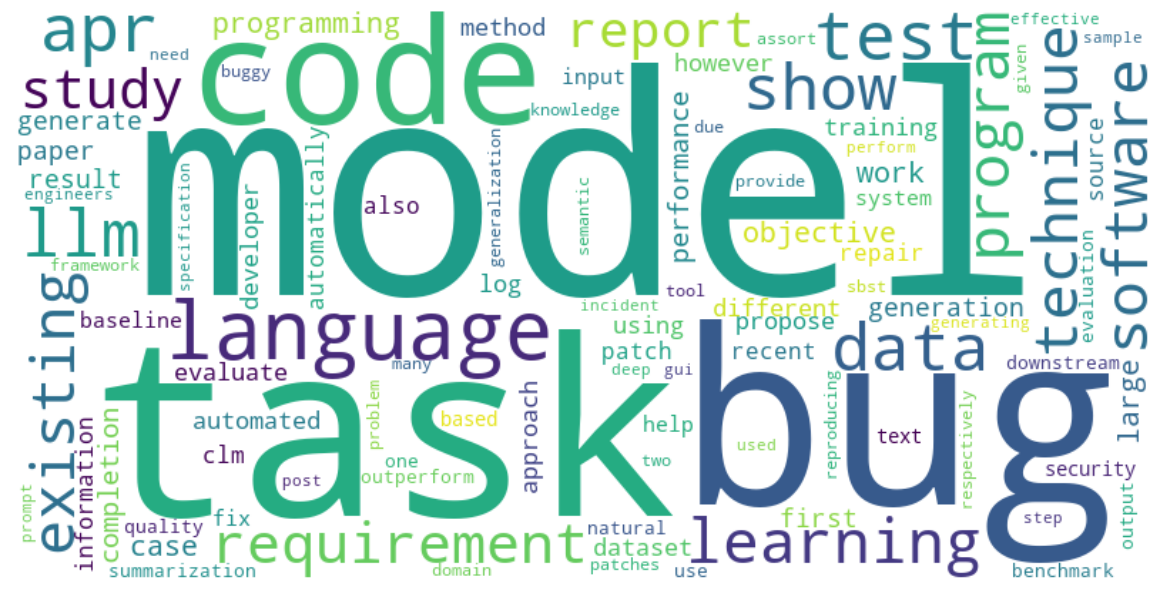


Top 20 most frequent unigrams in 23 LLM paper abstracts:
models: 42
code: 42
language: 30
bug: 28
model: 28
tasks: 24
apr: 24
data: 23
software: 20
learning: 20
existing: 19
task: 19
test: 19
llms: 18
requirements: 17
study: 16
techniques: 16
programming: 15
work: 15
large: 15


In [12]:
# Create unigram word clouds
print("ICSE 2023 Relevant LLM Papers Word Cloud (Unigrams):")
freq_2023_unigrams = create_wordcloud_with_ngrams(df_23, use_bigrams=False)

ICSE 2024 Relevant LLM Papers Word Cloud (Unigrams):


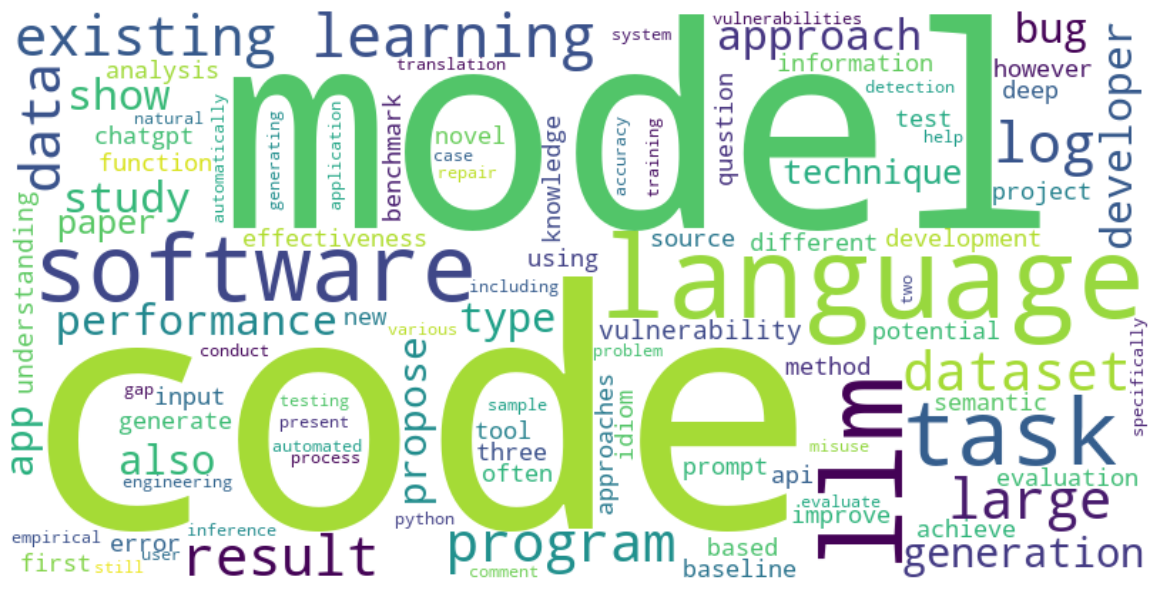


Top 20 most frequent unigrams in 54 LLM paper abstracts:
code: 212
models: 99
language: 82
llms: 62
software: 58
model: 48
learning: 47
tasks: 44
existing: 40
large: 39
results: 39
data: 39
performance: 35
study: 34
approach: 34
generation: 33
also: 32
developers: 32
log: 30
paper: 29


In [13]:
print("ICSE 2024 Relevant LLM Papers Word Cloud (Unigrams):")
freq_2024_unigrams = create_wordcloud_with_ngrams(df_24, use_bigrams=False)

### Bigram Word Clouds

ICSE 2023 Relevant LLM Papers Word Cloud (Bigrams):


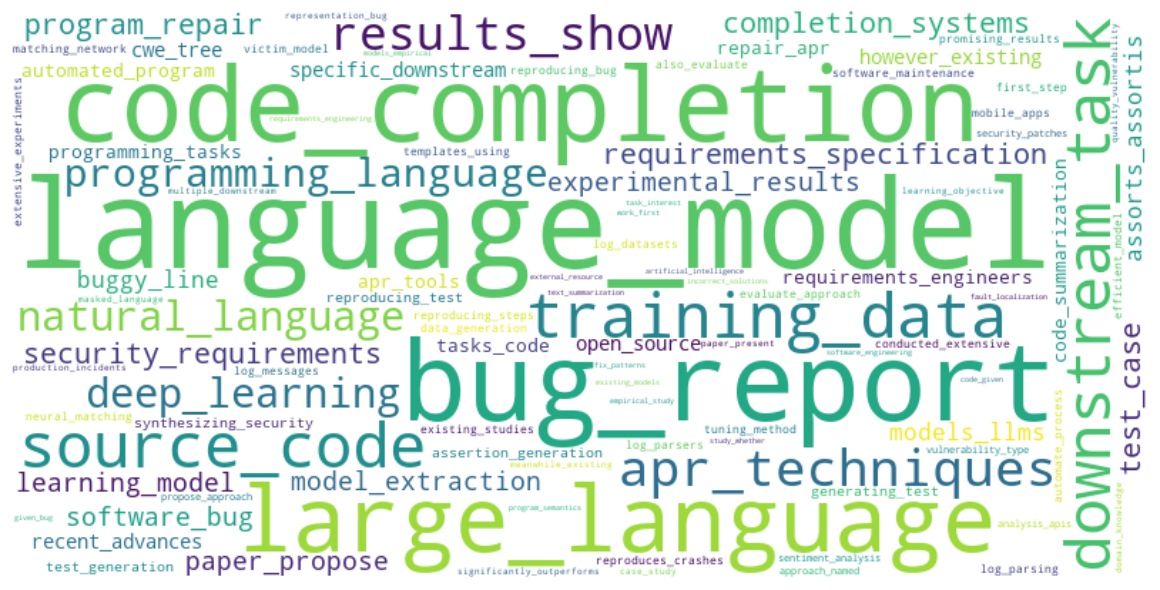


Top 20 most frequent bigrams in 23 LLM paper abstracts:
language_models: 17
code_completion: 14
bug_reports: 12
large_language: 11
training_data: 8
source_code: 8
apr_techniques: 7
results_show: 6
natural_language: 6
deep_learning: 6
program_repair: 6
security_requirements: 6
completion_systems: 6
paper_propose: 5
experimental_results: 5
model_extraction: 5
test_cases: 5
downstream_task: 4
downstream_tasks: 4
bug_report: 4


In [14]:
# Create bigram word clouds
print("ICSE 2023 Relevant LLM Papers Word Cloud (Bigrams):")
freq_2023_bigrams = create_wordcloud_with_ngrams(df_23, use_bigrams=True)

ICSE 2024 Relevant LLM Papers Word Cloud (Bigrams):


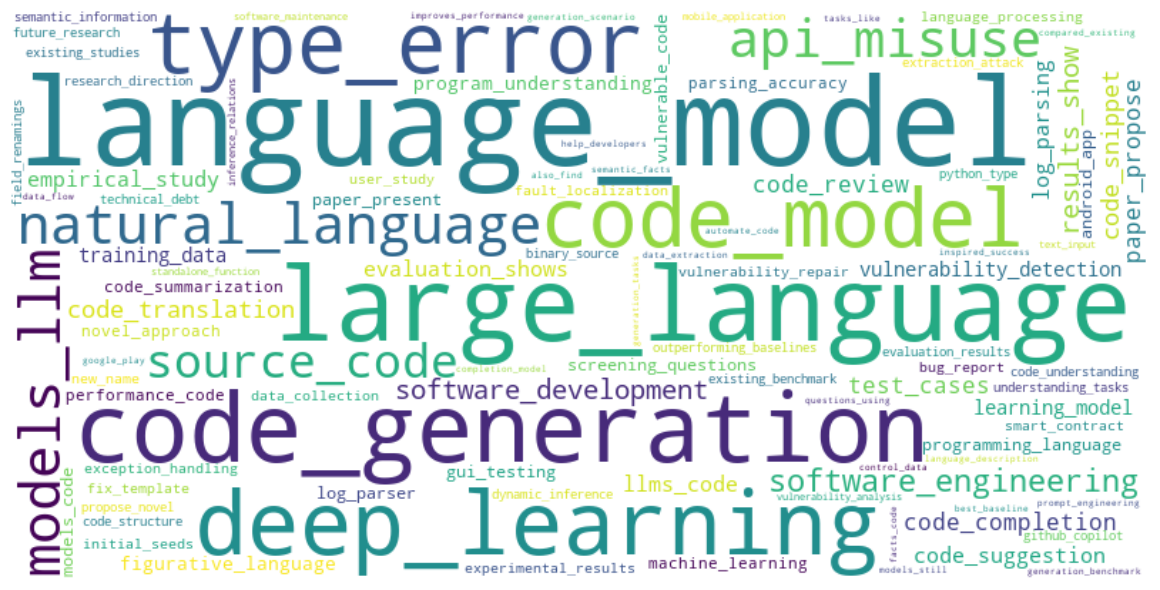


Top 20 most frequent bigrams in 54 LLM paper abstracts:
language_models: 34
large_language: 28
code_generation: 24
deep_learning: 21
natural_language: 17
models_llms: 16
type_errors: 15
source_code: 14
code_models: 14
software_engineering: 13
software_development: 12
results_show: 12
code_translation: 10
code_completion: 9
test_cases: 9
llms_code: 8
empirical_study: 8
log_parsing: 8
evaluation_shows: 8
api_misuse: 8


In [15]:
print("ICSE 2024 Relevant LLM Papers Word Cloud (Bigrams):")
freq_2024_bigrams = create_wordcloud_with_ngrams(df_24, use_bigrams=True)

## Combined Years

All Relevant LLM Papers Word Cloud (Unigrams):


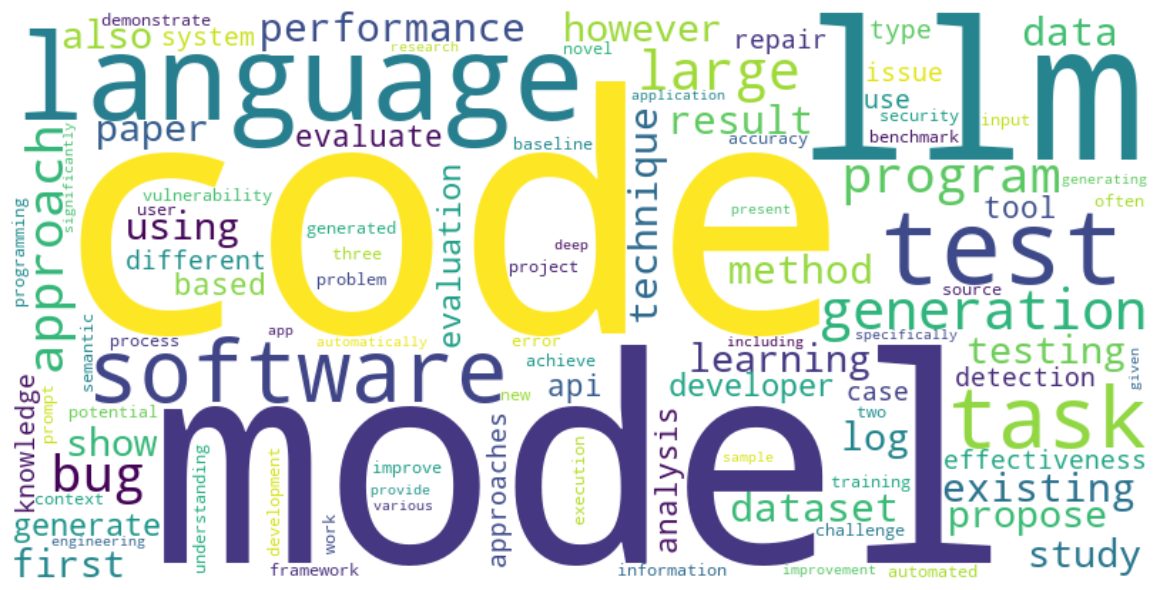


Top 20 most frequent unigrams in 174 LLM paper abstracts:
code: 579
llms: 299
models: 275
language: 222
software: 172
generation: 151
model: 149
large: 143
test: 139
approach: 129
existing: 114
performance: 113
data: 110
results: 108
tasks: 102
learning: 98
however: 95
testing: 92
llm: 92
paper: 90
All Relevant LLM Papers Word Cloud (Bigrams):


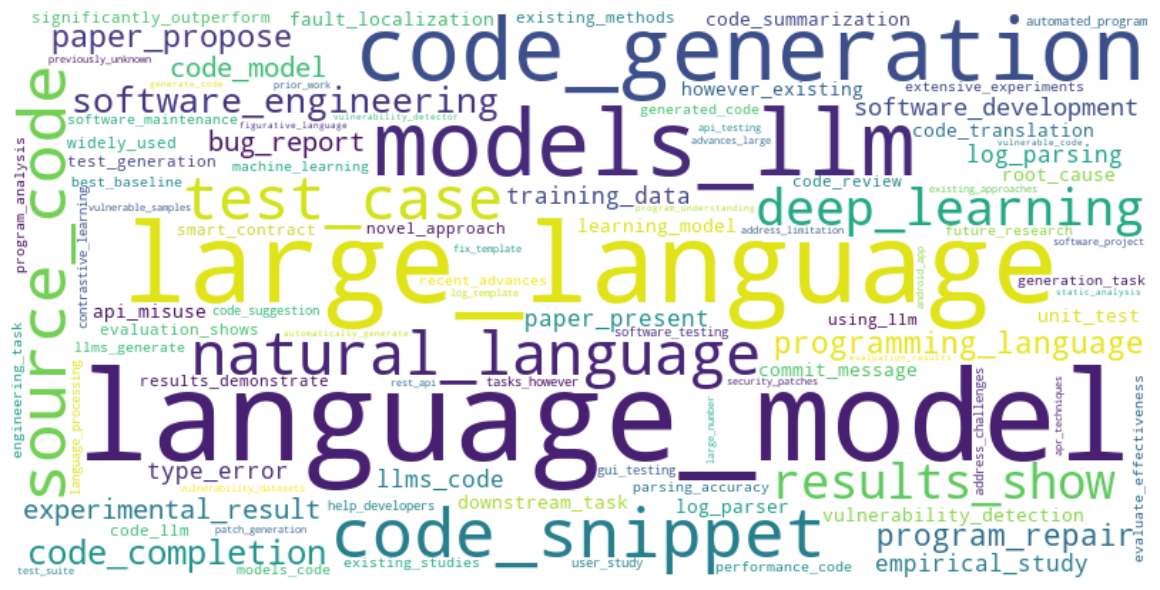


Top 20 most frequent bigrams in 174 LLM paper abstracts:
language_models: 122
large_language: 115
models_llms: 73
code_generation: 68
source_code: 37
natural_language: 36
deep_learning: 34
test_cases: 33
results_show: 32
software_engineering: 32
code_completion: 29
language_model: 25
program_repair: 24
code_snippets: 24
experimental_results: 23
software_development: 21
code_models: 19
log_parsing: 18
bug_reports: 18
empirical_study: 18


In [16]:
# Unigram Word Cloud
print("All Relevant LLM Papers Word Cloud (Unigrams):")
freq_combined_unigrams = create_wordcloud_with_ngrams(df_combined)

# Bigram Word Cloud
print("All Relevant LLM Papers Word Cloud (Bigrams):")
freq_combined_bigrams = create_wordcloud_with_ngrams(df_combined, use_bigrams=True)

# Papers by Country/Author

In [17]:
df_aff.head()

reviewer  relevant                                            title  \
0       DW      True  Log Parsing with Prompt-Based Few-Shot Learning   
1       DW      True  Log Parsing with Prompt-Based Few-Shot Learning   
2       DW      True   Context-Aware Bug Reproduction for Mobile Apps   
3       DW      True   Context-Aware Bug Reproduction for Mobile Apps   
4       DW      True   Context-Aware Bug Reproduction for Mobile Apps   

                                    original_authors  \
0                       Le, Van-Hoang, Zhang, Hongyu   
1                       Le, Van-Hoang, Zhang, Hongyu   
2  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
3  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
4  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   

                                            url extracted_author  \
0  https://doi.org/10.1109/ICSE48619.2023.00204     Van-Hoang Le   
1  https://doi.org/10.1109/ICSE48619.2023.00204     Hongyu Zhang   
2  https://doi.org/10.1109/ICSE48619.2023.00196     Yuchao Huang   
3  https://doi.org/10.1109/ICSE48619.2023.00196      Junjie Wang   
4  https://doi.org/10.1109/ICSE48619.2023.00196          Zhe Liu   

                                        affiliations    country  
0  School of Information and Physical Sciences, T...  Australia  
1  School of Big Data and Software Engineering, C...      China  
2  Science and Technology on Integrated Informati...      China  
3  Science and Technology on Integrated Informati...      China  
4  Science and Technology on Integrated Informati...      China

<Axes: ylabel='country'>

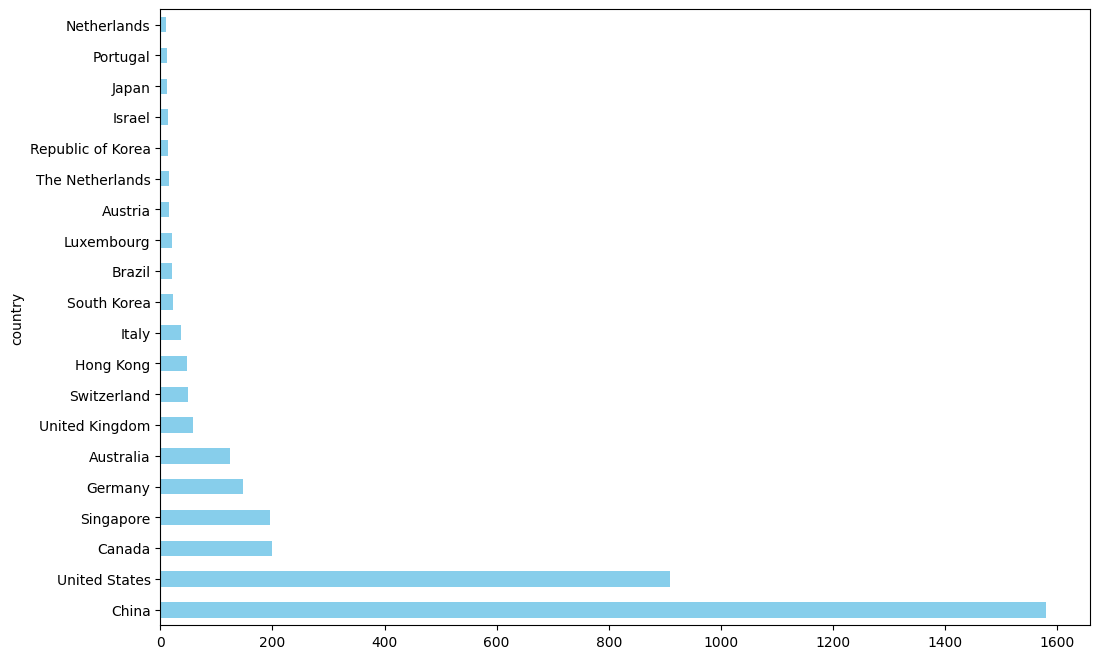

In [18]:
df_aff['country'].value_counts().head(20).plot(kind='barh', figsize=(12, 8), color='skyblue')

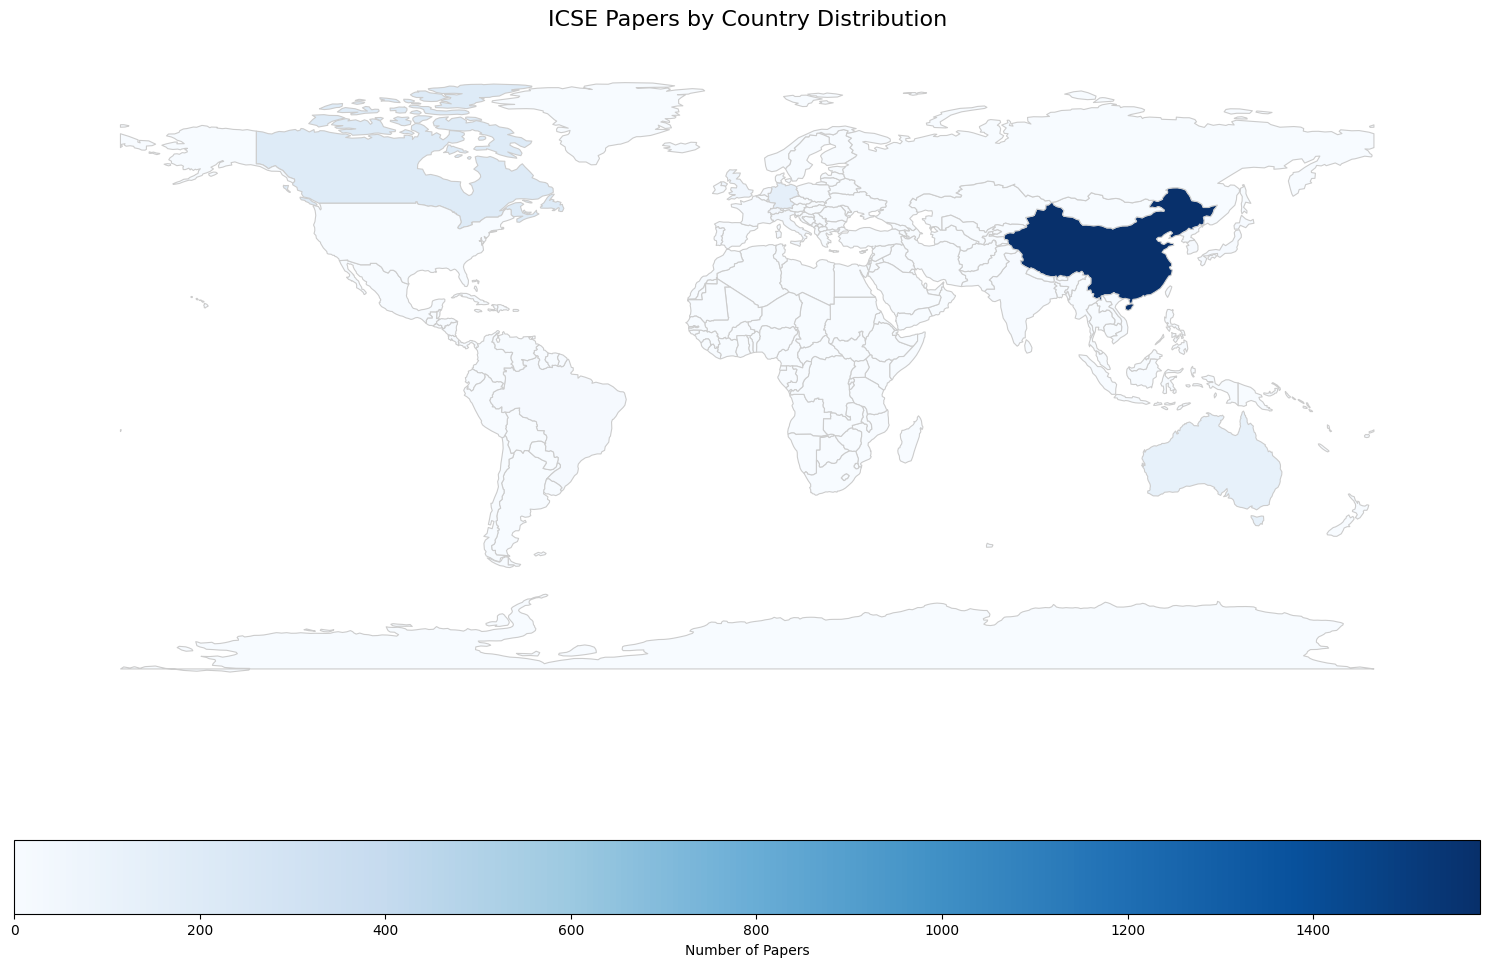

In [19]:
def create_static_country_map(df_aff, title="Country Distribution Map"):
    """
    Create a static world map showing country frequencies using matplotlib.
    
    Parameters:
    - df_aff: DataFrame with country data
    - title: Title for the map
    """
    # Get country value counts
    country_counts = df_aff['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'frequency']
    

    world_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
    world = gpd.read_file(world_url)
    
    world_data = world.merge(country_counts, left_on='name', right_on='country', how='left')
    world_data['frequency'] = world_data['frequency'].fillna(0)
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # Plot countries with data
    world_data.plot(column='frequency', 
                    cmap='Blues', 
                    linewidth=0.8, 
                    ax=ax, 
                    edgecolor='0.8',
                    legend=True,
                    legend_kwds={'label': "Number of Papers",
                                'orientation': "horizontal"})
    
    ax.set_title(title, fontsize=16, pad=20)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return world_data

# Create the static map
country_freq_data = create_static_country_map(df_aff, "ICSE Papers by Country Distribution")

<Axes: ylabel='extracted_author'>

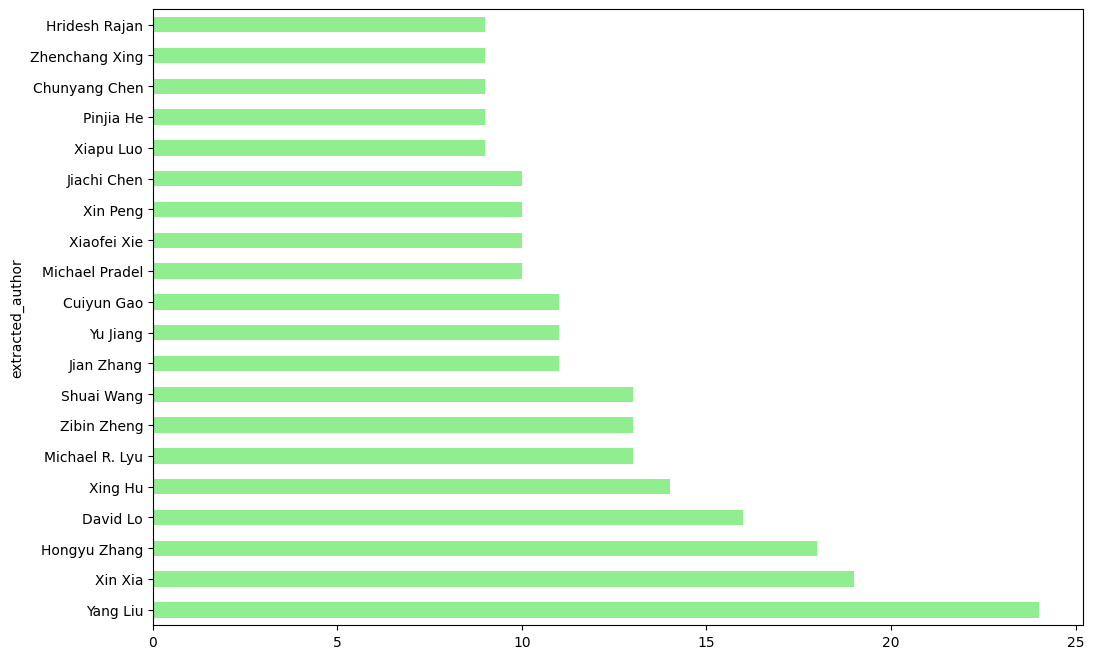

In [20]:
df_aff['extracted_author'].value_counts().head(20).plot(kind='barh', figsize=(12, 8), color='lightgreen')

In [23]:
df_aff.head(30)

reviewer  relevant                                              title  \
0        DW      True    Log Parsing with Prompt-Based Few-Shot Learning   
1        DW      True    Log Parsing with Prompt-Based Few-Shot Learning   
2        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
3        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
4        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
5        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
6        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
7        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
8        DW      True     Context-Aware Bug Reproduction for Mobile Apps   
9       NaN     False  Vulnerability Detection with Graph Simplificat...   
10      NaN     False  Vulnerability Detection with Graph Simplificat...   
11      NaN     False  Vulnerability Detection with Graph Simplificat...   
12      NaN     False  Vulnerability Detection with Graph Simplificat...   
13      NaN     False  Vulnerability Detection with Graph Simplificat...   
14      NaN     False  Vulnerability Detection with Graph Simplificat...   
15      NaN     False  DIVER: Oracle-Guided SMT Solver Testing with U...   
16      NaN     False  DIVER: Oracle-Guided SMT Solver Testing with U...   
17      NaN     False  DIVER: Oracle-Guided SMT Solver Testing with U...   
18      NaN     False  On the Robustness of Code Generation Technique...   
19      NaN     False  On the Robustness of Code Generation Technique...   
20      NaN     False  On the Robustness of Code Generation Technique...   
21      NaN     False  On the Robustness of Code Generation Technique...   
22      NaN     False  On the Robustness of Code Generation Technique...   
23      NaN     False  On the Robustness of Code Generation Technique...   
24      NaN     False  On the Robustness of Code Generation Technique...   
25      NaN     False        Learning Deep Semantics for Test Completion   
26      NaN     False        Learning Deep Semantics for Test Completion   
27      NaN     False        Learning Deep Semantics for Test Completion   
28      NaN     False        Learning Deep Semantics for Test Completion   
29      NaN     False        Learning Deep Semantics for Test Completion   

                                     original_authors  \
0                        Le, Van-Hoang, Zhang, Hongyu   
1                        Le, Van-Hoang, Zhang, Hongyu   
2   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
3   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
4   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
5   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
6   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
7   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
8   Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
9   Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
10  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
11  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
12  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
13  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
14  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   
15             Kim, Jongwook, So, Sunbeom, Oh, Hakjoo   
16             Kim, Jongwook, So, Sunbeom, Oh, Hakjoo   
17             Kim, Jongwook, So, Sunbeom, Oh, Hakjoo   
18  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
19  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
20  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
21  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
22  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
23  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
24  Mastropaolo, Antonio, Pascarella, Luca, Guglie...   
25  Nie, Pengyu, Banerjee, Rahul, Li, Junyi Jessy,...   
26  Nie, Pengyu, Banerjee, Rahul, Li, Junyi Jessy,...   
27  Nie, Pengyu, Banerjee, Rahul, Li, Junyi Jessy,

In [24]:
# Let's examine the dataframe structure and columns
print("DataFrame shape:", df_aff.shape)
print("\nColumns:", df_aff.columns.tolist())
print("\nInfo about the dataframe:")
print(df_aff.info())
print("\nSample of unique countries:")
print(df_aff['country'].value_counts().head(10))

DataFrame shape: (3577, 8)

Columns: ['reviewer', 'relevant', 'title', 'original_authors', 'url', 'extracted_author', 'affiliations', 'country']

Info about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewer          1577 non-null   object
 1   relevant          3577 non-null   bool  
 2   title             3577 non-null   object
 3   original_authors  3577 non-null   object
 4   url               3577 non-null   object
 5   extracted_author  3577 non-null   object
 6   affiliations      3576 non-null   object
 7   country           3576 non-null   object
dtypes: bool(1), object(7)
memory usage: 199.2+ KB
None

Sample of unique countries:
country
China             1580
United States      910
Canada             199
Singapore          196
Germany            147
Australia          125
United Kingdom      59
Switzerl

# Geographical Analysis: Where is SE Research Primarily Conducted?

In [25]:
def analyze_se_research_by_country(df_aff):
    """
    Comprehensive analysis of where SE research is conducted based on author affiliations.
    """
    print("=== ANALYSIS: Where is SE Research Primarily Conducted? ===\n")
    
    # 1. Country-level analysis (by authors)
    print("1. COUNTRY DISTRIBUTION BY AUTHORS:")
    print("-" * 50)
    country_counts = df_aff['country'].value_counts()
    total_authors = len(df_aff)
    
    print(f"Total authors: {total_authors:,}")
    print(f"Total unique countries: {len(country_counts)}")
    print("\nTop 15 countries by number of authors:")
    
    top_15_countries = country_counts.head(15)
    for rank, (country, count) in enumerate(top_15_countries.items(), 1):
        percentage = (count / total_authors) * 100
        print(f"{rank:2d}. {country:20s}: {count:4d} authors ({percentage:5.1f}%)")
    
    print(f"\nTop 5 countries account for {top_15_countries.head(5).sum() / total_authors * 100:.1f}% of all authors")
    print(f"Top 10 countries account for {top_15_countries.head(10).sum() / total_authors * 100:.1f}% of all authors")
    
    # 2. Paper-level analysis (unique papers per country)
    print("\n\n2. COUNTRY DISTRIBUTION BY UNIQUE PAPERS:")
    print("-" * 50)
    
    # Count unique papers per country (a paper can be counted for multiple countries if it has international collaboration)
    papers_by_country = df_aff.groupby('country')['title'].nunique().sort_values(ascending=False)
    total_unique_papers = df_aff['title'].nunique()
    
    print(f"Total unique papers: {total_unique_papers:,}")
    print("Top 15 countries by number of unique papers they contributed to:")
    
    top_15_papers = papers_by_country.head(15)
    for rank, (country, count) in enumerate(top_15_papers.items(), 1):
        percentage = (count / total_unique_papers) * 100
        print(f"{rank:2d}. {country:20s}: {count:4d} papers ({percentage:5.1f}%)")
    
    # 3. International collaboration analysis
    print("\n\n3. INTERNATIONAL COLLABORATION ANALYSIS:")
    print("-" * 50)
    
    # For each paper, count how many unique countries are involved
    countries_per_paper = df_aff.groupby('title')['country'].nunique().reset_index()
    countries_per_paper.columns = ['title', 'num_countries']
    
    single_country_papers = len(countries_per_paper[countries_per_paper['num_countries'] == 1])
    multi_country_papers = len(countries_per_paper[countries_per_paper['num_countries'] > 1])
    
    print(f"Papers with authors from single country: {single_country_papers:4d} ({single_country_papers/total_unique_papers*100:.1f}%)")
    print(f"Papers with international collaboration: {multi_country_papers:4d} ({multi_country_papers/total_unique_papers*100:.1f}%)")
    
    print(f"\nDistribution of countries per paper:")
    collab_dist = countries_per_paper['num_countries'].value_counts().sort_index()
    for num_countries, count in collab_dist.items():
        print(f"  {num_countries} country/countries: {count:4d} papers ({count/total_unique_papers*100:.1f}%)")
    
    # 4. Regional analysis
    print("\n\n4. REGIONAL ANALYSIS:")
    print("-" * 50)
    
    # Define regions (you can adjust these groupings as needed)
    regions = {
        'East Asia': ['China', 'Japan', 'South Korea', 'Taiwan', 'Hong Kong', 'Macau'],
        'North America': ['United States', 'Canada', 'Mexico'],
        'Europe': ['Germany', 'United Kingdom', 'Switzerland', 'Italy', 'France', 'Netherlands', 
                  'Sweden', 'Norway', 'Denmark', 'Finland', 'Spain', 'Austria', 'Belgium',
                  'Czech Republic', 'Poland', 'Greece', 'Portugal', 'Ireland', 'Luxembourg'],
        'Southeast Asia/Oceania': ['Singapore', 'Australia', 'New Zealand', 'Malaysia', 'Thailand', 
                                   'Indonesia', 'Philippines', 'Vietnam'],
        'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka'],
        'Middle East/Africa': ['Israel', 'South Africa', 'Egypt', 'Turkey', 'Iran', 'Saudi Arabia', 'UAE'],
        'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Uruguay']
    }
    
    # Assign regions to countries
    df_regions = df_aff.copy()
    df_regions['region'] = 'Other'
    
    for region, countries in regions.items():
        df_regions.loc[df_regions['country'].isin(countries), 'region'] = region
    
    region_counts = df_regions['region'].value_counts()
    
    print("Authors by region:")
    for region, count in region_counts.items():
        percentage = (count / total_authors) * 100
        print(f"  {region:25s}: {count:4d} authors ({percentage:5.1f}%)")
    
    return country_counts, papers_by_country, countries_per_paper, region_counts

# Run the analysis
country_stats = analyze_se_research_by_country(df_aff)

=== ANALYSIS: Where is SE Research Primarily Conducted? ===

1. COUNTRY DISTRIBUTION BY AUTHORS:
--------------------------------------------------
Total authors: 3,577
Total unique countries: 40

Top 15 countries by number of authors:
 1. China               : 1580 authors ( 44.2%)
 2. United States       :  910 authors ( 25.4%)
 3. Canada              :  199 authors (  5.6%)
 4. Singapore           :  196 authors (  5.5%)
 5. Germany             :  147 authors (  4.1%)
 6. Australia           :  125 authors (  3.5%)
 7. United Kingdom      :   59 authors (  1.6%)
 8. Switzerland         :   49 authors (  1.4%)
 9. Hong Kong           :   47 authors (  1.3%)
10. Italy               :   37 authors (  1.0%)
11. South Korea         :   22 authors (  0.6%)
12. Brazil              :   21 authors (  0.6%)
13. Luxembourg          :   21 authors (  0.6%)
14. Austria             :   16 authors (  0.4%)
15. The Netherlands     :   15 authors (  0.4%)

Top 5 countries account for 84.8% of all au

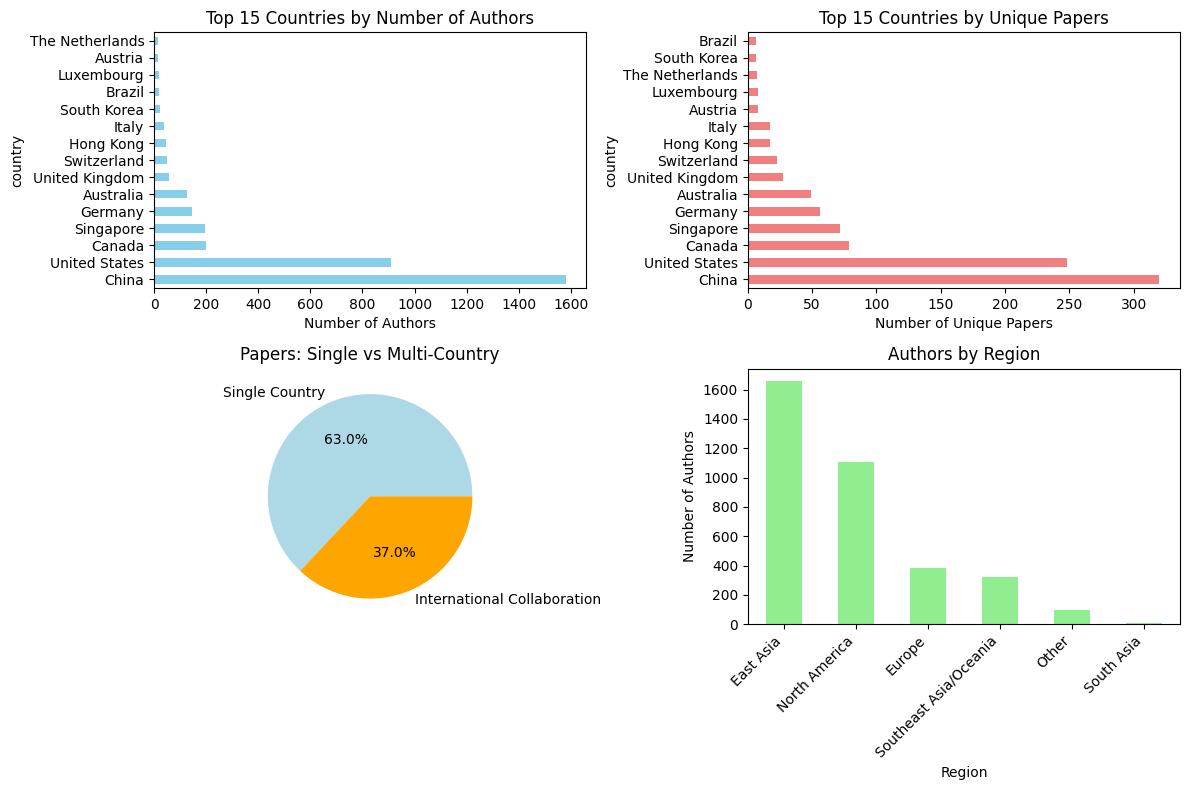

In [27]:
def create_geographical_visualizations(df_aff):
    """
    Create visualizations showing geographical distribution of SE research.
    """
    
    # 1. Top countries by authors - horizontal bar chart
    plt.figure(figsize=(12, 8))
    country_counts = df_aff['country'].value_counts().head(15)
    
    plt.subplot(2, 2, 1)
    country_counts.plot(kind='barh', color='skyblue')
    plt.title('Top 15 Countries by Number of Authors')
    plt.xlabel('Number of Authors')
    
    # 2. Top countries by unique papers
    plt.subplot(2, 2, 2)
    papers_by_country = df_aff.groupby('country')['title'].nunique().sort_values(ascending=False).head(15)
    papers_by_country.plot(kind='barh', color='lightcoral')
    plt.title('Top 15 Countries by Unique Papers')
    plt.xlabel('Number of Unique Papers')
    
    # 3. International collaboration - pie chart
    plt.subplot(2, 2, 3)
    countries_per_paper = df_aff.groupby('title')['country'].nunique().reset_index()
    countries_per_paper.columns = ['title', 'num_countries']
    
    single_country = len(countries_per_paper[countries_per_paper['num_countries'] == 1])
    multi_country = len(countries_per_paper[countries_per_paper['num_countries'] > 1])
    
    plt.pie([single_country, multi_country], 
            labels=['Single Country', 'International Collaboration'], 
            autopct='%1.1f%%',
            colors=['lightblue', 'orange'])
    plt.title('Papers: Single vs Multi-Country')
    
    # 4. Regional distribution
    plt.subplot(2, 2, 4)
    regions = {
        'East Asia': ['China', 'Japan', 'South Korea', 'Taiwan', 'Hong Kong', 'Macau'],
        'North America': ['United States', 'Canada', 'Mexico'],
        'Europe': ['Germany', 'United Kingdom', 'Switzerland', 'Italy', 'France', 'Netherlands', 
                  'Sweden', 'Norway', 'Denmark', 'Finland', 'Spain', 'Austria', 'Belgium',
                  'Czech Republic', 'Poland', 'Greece', 'Portugal', 'Ireland', 'Luxembourg'],
        'Southeast Asia/Oceania': ['Singapore', 'Australia', 'New Zealand', 'Malaysia', 'Thailand'],
        'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka'],
        'Other': []  # Will be assigned to remaining countries
    }
    
    df_regions = df_aff.copy()
    df_regions['region'] = 'Other'
    
    for region, countries in regions.items():
        if region != 'Other':
            df_regions.loc[df_regions['country'].isin(countries), 'region'] = region
    
    region_counts = df_regions['region'].value_counts()
    bars = region_counts.plot(kind='bar', color='lightgreen')
    plt.title('Authors by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Authors')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return region_counts

# Create visualizations
regional_distribution = create_geographical_visualizations(df_aff)

=== TEMPORAL ANALYSIS: Geographical Trends Over Time ===

Distribution of authors by year:
  2023: 1009 authors
  2024: 1233 authors
  2025: 1335 authors

TOP 10 COUNTRIES BY YEAR:

2023:
--------------------
 1. China               : 413 authors ( 40.9%)
 2. United States       : 258 authors ( 25.6%)
 3. Canada              :  57 authors (  5.6%)
 4. Australia           :  47 authors (  4.7%)
 5. Singapore           :  47 authors (  4.7%)
 6. Germany             :  46 authors (  4.6%)
 7. Switzerland         :  20 authors (  2.0%)
 8. Brazil              :  16 authors (  1.6%)
 9. Hong Kong           :  16 authors (  1.6%)
10. Italy               :  15 authors (  1.5%)

2024:
--------------------
 1. China               : 595 authors ( 48.3%)
 2. United States       : 263 authors ( 21.3%)
 3. Singapore           :  84 authors (  6.8%)
 4. Canada              :  61 authors (  4.9%)
 5. Australia           :  43 authors (  3.5%)
 6. Germany             :  42 authors (  3.4%)
 7. United 

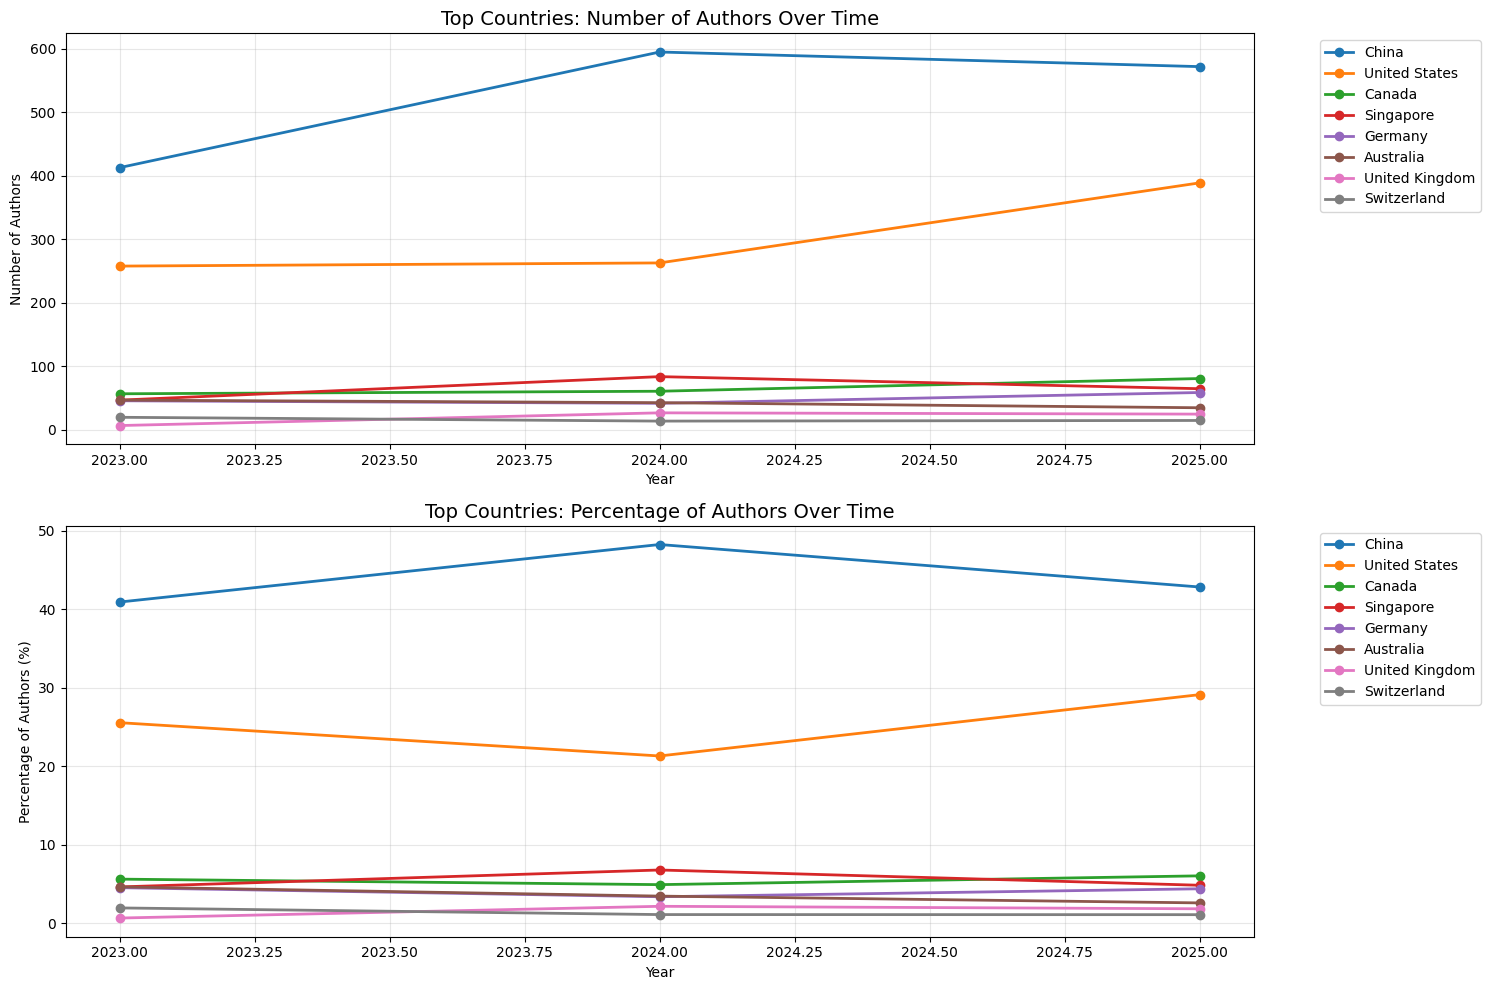


YEAR-OVER-YEAR GROWTH ANALYSIS:

China:
  2023 → 2024: 413 → 595 authors (+44.1%)
  2024 → 2025: 595 → 572 authors ( -3.9%)

United States:
  2023 → 2024: 258 → 263 authors ( +1.9%)
  2024 → 2025: 263 → 389 authors (+47.9%)

Canada:
  2023 → 2024:  57 →  61 authors ( +7.0%)
  2024 → 2025:  61 →  81 authors (+32.8%)

Singapore:
  2023 → 2024:  47 →  84 authors (+78.7%)
  2024 → 2025:  84 →  65 authors (-22.6%)

Germany:
  2023 → 2024:  46 →  42 authors ( -8.7%)
  2024 → 2025:  42 →  59 authors (+40.5%)


In [29]:
def analyze_geographical_trends_over_time(df_aff):
    """
    Analyze how the geographical distribution of SE research has changed over time.
    """
    print("=== TEMPORAL ANALYSIS: Geographical Trends Over Time ===\n")
    
    # First, we need to add year information to df_aff by merging with df_combined
    # Create a mapping from title to year using df_combined
    title_to_year = df_combined[['title', 'year']].drop_duplicates()
    
    # Merge to add year information to affiliations data
    df_aff_with_year = df_aff.merge(title_to_year, on='title', how='left')
    
    print("Distribution of authors by year:")
    year_distribution = df_aff_with_year['year'].value_counts().sort_index()
    for year, count in year_distribution.items():
        print(f"  {year}: {count:4d} authors")
    
    print("\n" + "="*60)
    print("TOP 10 COUNTRIES BY YEAR:")
    print("="*60)
    
    for year in sorted(df_aff_with_year['year'].unique()):
        year_data = df_aff_with_year[df_aff_with_year['year'] == year]
        country_counts_year = year_data['country'].value_counts().head(10)
        total_authors_year = len(year_data)
        
        print(f"\n{year}:")
        print("-" * 20)
        for rank, (country, count) in enumerate(country_counts_year.items(), 1):
            percentage = (count / total_authors_year) * 100
            print(f"{rank:2d}. {country:20s}: {count:3d} authors ({percentage:5.1f}%)")
    
    # Create a visualization showing top countries over time
    plt.figure(figsize=(15, 10))
    
    # Get top 8 countries overall for consistent comparison
    top_countries = df_aff['country'].value_counts().head(8).index.tolist()
    
    # Create data for each year
    years = sorted(df_aff_with_year['year'].unique())
    country_data = {}
    year_totals = {}
    
    for country in top_countries:
        country_data[country] = []
        
    for year in years:
        year_data = df_aff_with_year[df_aff_with_year['year'] == year]
        year_totals[year] = len(year_data)
        
        for country in top_countries:
            count = len(year_data[year_data['country'] == country])
            country_data[country].append(count)
    
    # Plot lines for each country
    plt.subplot(2, 1, 1)
    for country in top_countries:
        plt.plot(years, country_data[country], marker='o', label=country, linewidth=2)
    
    plt.title('Top Countries: Number of Authors Over Time', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Authors')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Create percentage plot
    plt.subplot(2, 1, 2)
    for country in top_countries:
        percentages = []
        for i, year in enumerate(years):
            percentage = (country_data[country][i] / year_totals[year]) * 100
            percentages.append(percentage)
        plt.plot(years, percentages, marker='o', label=country, linewidth=2)
    
    plt.title('Top Countries: Percentage of Authors Over Time', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Percentage of Authors (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate year-over-year growth rates for top countries
    print("\n" + "="*60)
    print("YEAR-OVER-YEAR GROWTH ANALYSIS:")
    print("="*60)
    
    for country in top_countries[:5]:  # Top 5 countries only
        print(f"\n{country}:")
        counts = country_data[country]
        for i in range(1, len(counts)):
            if counts[i-1] > 0:
                growth = ((counts[i] - counts[i-1]) / counts[i-1]) * 100
                print(f"  {years[i-1]} → {years[i]}: {counts[i-1]:3d} → {counts[i]:3d} authors ({growth:+5.1f}%)")
    
    return df_aff_with_year, country_data

# Run temporal analysis
df_aff_temporal, temporal_data = analyze_geographical_trends_over_time(df_aff)

In [32]:
df_aff[df_aff["extracted_author"] == "David Lo"]

reviewer  relevant                                              title  \
74         DW     False  Chronos: Time-Aware Zero-Shot Identification o...   
163       NaN     False  Two Sides of the Same Coin: Exploiting the Imp...   
201        DW      True  Fine-Grained Commit-Level Vulnerability Type P...   
875        FS     False  CoLeFunDa: Explainable Silent Vulnerability Fi...   
1115      NaN     False  MiniMon: Minimizing Android Applications with ...   
1268       DW     False  Curiosity-Driven Testing for Sequential Decisi...   
1290       DW      True  Code Search is All You Need? Improving Code Su...   
1307      NaN     False  Exploiting Library Vulnerability via Migration...   
1313      NaN     False       PPT4J: Patch Presence Test for Java Binaries   
1499       AA      True  Streamlining Java Programming: Uncovering Well...   
1505      NaN     False  PS3: Precise Patch Presence Test based on Sema...   
1659       AA      True  Out of Sight, Out of Mind: Better Automatic Vu...   
1675      NaN     False  Coca: Improving and Explaining Graph Neural Ne...   
1694      NaN     False         MUT: Human-in-the-Loop Unit Test Migration   
1879       FS      True              Unveiling Memorization in Code Models   
2236      NaN     False  FAIR: Flow Type-Aware Pre-Training of Compiler...   

                                       original_authors  \
74    Lyu, Yunbo, Le-Cong, Thanh, Kang, Hong Jin, Wi...   
163   Gao, Shuzheng, Gao, Cuiyun, Wang, Chaozheng, S...   
201   Pan, Shengyi, Bao, Lingfeng, Xia, Xin, Lo, Dav...   
875   Zhou, Jiayuan, Pacheco, Michael, Chen, Jinfu, ...   
1115  Liu, Jiakun, Zhang, Zicheng, Hu, Xing, Thung, ...   
1268  He, Junda, Yang, Zhou, Shi, Jieke, Yang, Cheng...   
1290  Chen, Junkai, Hu, Xing, Li, Zhenhao, Gao, Cuiy...   
1307  Chen, Zirui, Hu, Xing, Xia, Xin, Gao, Yi, Xu, ...   
1313  Pan, Zhiyuan, Hu, Xing, Xia, Xin, Zhan, Xian, ...   
1499  Yang, Yanming, Hu, Xing, Xia, Xin, Lo, David, ...   
1505  Zhan, Qi, Hu, Xing, Li, Zhiyang, Xia, Xin, Lo,...   
1659  Zhou, Xin, Kim, Kisub, Xu, Bowen, Han, Donggyu...   
1675  Cao, Sicong, Sun, Xiaobing, Wu, Xiaoxue, Lo, D...   
1694  Gao, Yi, Hu, Xing, Xu, Tongtong, Xia, Xin, Lo,...   
1879  Yang, Zhou, Zhao, Zhipeng, Wang, Chenyu, Shi, ...   
2236  Niu, Changan, Li, Chuanyi, Ng, Vincent, Lo, Da...   

                                               url extracted_author  \
74    https://doi.org/10.1109/ICSE48619.2023.00094         David Lo   
163   https://doi.org/10.1109/ICSE48619.2023.00164         David Lo   
201   https://doi.org/10.1109/ICSE48619.2023.00088         David Lo   
875   https://doi.org/10.1109/ICSE48619.2023.00214         David Lo   
1115       https://doi.org/10.1145/3597503.3639113         David Lo   
1268       https://doi.org/10.1145/3597503.3639149         David Lo   
1290       https://doi.org/10.1145/3597503.3639085         David Lo   
1307       https://doi.org/10.1145/3597503.3639583         David Lo   
1313       https://doi.org/10.1145/3597503.3639231         David Lo   
1499       https://doi.org/10.1145/3597503.3639135         David Lo   
1505       https://doi.org/10.1145/3597503.3639134         David Lo   
1659       https://doi.org/10.1145/3597503.3639222         David Lo   
1675       https://doi.org/10.1145/3597503.3639168         David Lo   
1694       https://doi.org/10.1145/3597503.3639124         David Lo   
1879       https://doi.org/10.1145/3597503.3639074         David Lo   
2236       https://doi.org/10.1145/3597503.3608136         David Lo   

                                           affiliations    country  
74                      Singapore Management University  Singapore  
163           Singapore Management University,Singapore  Singapore  
201   School of Information Systems, Singapore Manag...  Singapore  
875   School of Information Systems, Singapore Manag...  Singapore  
1115  Singapore Management University, Singapore, Si...  Singapore  
1268  Singapore Management University, Singapore, Si

In [44]:
    # Merge to add year information to affiliations data
    df_aff_combined = df_aff.merge(df_combined.drop(columns=['url','reviewer', 'relevant'], axis=1), on='title', how='left')

    df_aff_combined.head(10)

reviewer  relevant                                              title  \
0       DW      True    Log Parsing with Prompt-Based Few-Shot Learning   
1       DW      True    Log Parsing with Prompt-Based Few-Shot Learning   
2       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
3       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
4       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
5       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
6       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
7       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
8       DW      True     Context-Aware Bug Reproduction for Mobile Apps   
9      NaN     False  Vulnerability Detection with Graph Simplificat...   

                                    original_authors  \
0                       Le, Van-Hoang, Zhang, Hongyu   
1                       Le, Van-Hoang, Zhang, Hongyu   
2  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
3  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
4  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
5  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
6  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
7  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
8  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
9  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   

                                            url extracted_author  \
0  https://doi.org/10.1109/ICSE48619.2023.00204     Van-Hoang Le   
1  https://doi.org/10.1109/ICSE48619.2023.00204     Hongyu Zhang   
2  https://doi.org/10.1109/ICSE48619.2023.00196     Yuchao Huang   
3  https://doi.org/10.1109/ICSE48619.2023.00196      Junjie Wang   
4  https://doi.org/10.1109/ICSE48619.2023.00196          Zhe Liu   
5  https://doi.org/10.1109/ICSE48619.2023.00196        Song Wang   
6  https://doi.org/10.1109/ICSE48619.2023.00196    Chunyang Chen   
7  https://doi.org/10.1109/ICSE48619.2023.00196      Mingyang Li   
8  https://doi.org/10.1109/ICSE48619.2023.00196        Qing Wang   
9  https://doi.org/10.1109/ICSE48619.2023.00191    Xin-Cheng Wen   

                                        affiliations    country  \
0  School of Information and Physical Sciences, T...  Australia   
1  School of Big Data and Software Engineering, C...      China   
2  Science and Technology on Integrated Informati...      China   
3  Science and Technology on Integrated Informati...      China   
4  Science and Technology on Integrated Informati...      China   
5  York University,Electrical Engineering and Com...     Canada   
6              Monash University,Melbourne,Australia  Australia   
7  Science and Technology on Integrated Informati...      China   
8  Science and Technology on Integrated Informati...      China   
9  School of Computer Science and Technology, Har...      China   

                                             authors  \
0                       Le, Van-Hoang, Zhang, Hongyu   
1                       Le, Van-Hoang, Zhang, Hongyu   
2  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
3  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
4  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
5  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
6  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
7  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
8  Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...   
9  Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...   

                                            abstract  artifact_available  \
0  Logs generated by large-scale software systems...               False   
1  Logs generated by large-scale software systems...               False   
2  Bug reports are vital for software maintenance...               False   
3  Bug reports are vital for software maintenance...               False   
4  Bug reports are vital for software maintenance...               False   

In [46]:
df_aff_combined[df_aff_combined["relevant"]]['title'].nunique()

174

Total relevant papers with country data: 174


<Axes: title={'center': 'Top 10 Countries Contributing to LLM Papers'}, ylabel='count'>

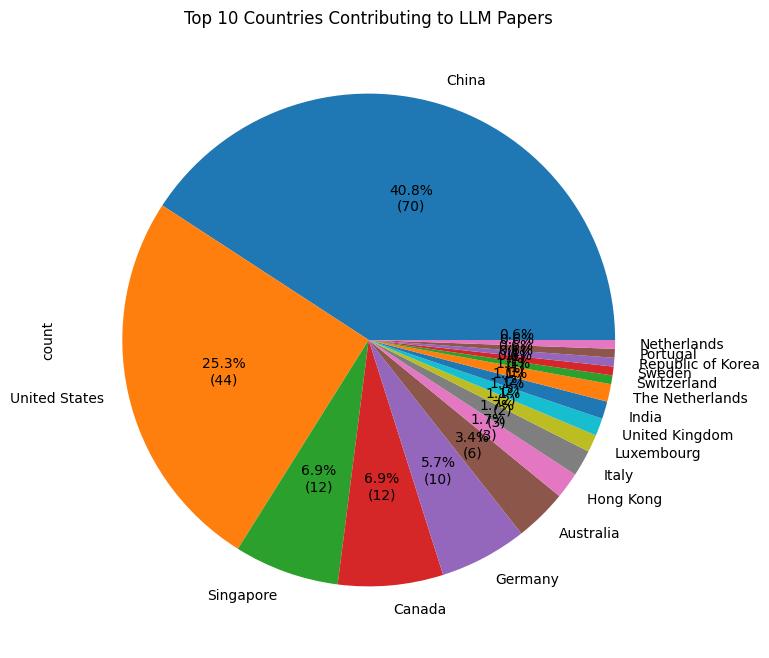

In [56]:
# For each relevant paper, calculate the mode country of its authors to determine where the research was primarily conducted
rel_papers_countries = df_aff_combined[df_aff_combined["relevant"]].groupby("title")["country"].agg(lambda x: x.mode().iloc[0])
print(f"Total relevant papers with country data: {len(rel_papers_countries)}")

# Generate a pie chart of what countries contributed to relevant papers
total_papers = len(rel_papers_countries)
rel_papers_countries.value_counts().plot(kind='pie', 
                                        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_papers)})', 
                                        figsize=(8, 8), 
                                        title="Top 10 Countries Contributing to LLM Papers")

Total non-LLM papers with country data: 518


<Axes: title={'center': 'Top 10 Countries Contributing to Non-LLM Papers'}, ylabel='count'>

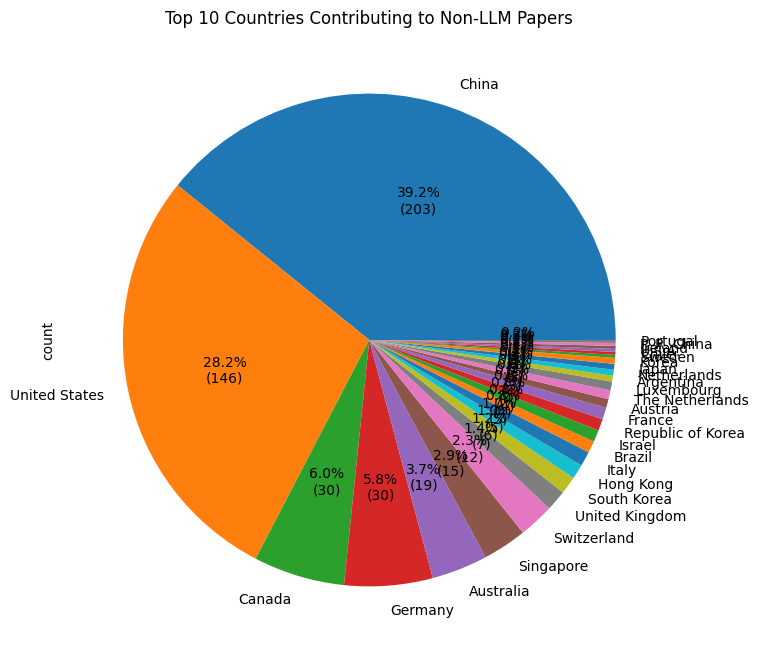

In [55]:
# For each relevant paper, calculate the mode country of its authors to determine where the research was primarily conducted
rel_papers_countries = df_aff_combined[~df_aff_combined["relevant"]].groupby("title")["country"].agg(lambda x: x.mode().iloc[0])
print("Total non-LLM papers with country data:", len(rel_papers_countries))

# Generate a pie chart of what countries contributed to relevant papers
# rel_papers_countries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Top 10 Countries Contributing to Non-LLM Papers")

total_papers = len(rel_papers_countries)
rel_papers_countries.value_counts().plot(kind='pie', 
                                        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_papers)})', 
                                        figsize=(8, 8), 
                                        title="Top 10 Countries Contributing to Non-LLM Papers")